# trendlines(uptrend and downtrend)
# scoring

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.graph_objects as go
from convertdate import persian
import copy
from sklearn.linear_model import LinearRegression

In [114]:
file_path = "ticker_codes.json"

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
    
symbols_and_codes = [(item["code"], item["symbol"]) for item in data]
symbols_and_codes
    

[('7745894403636165', 'شپنا'),
 ('2400322364771558', 'شستا'),
 ('66772024744156373', 'فباهنر'),
 ('35425587644337450', 'فملی'),
 ('63917421733088077', 'وتجارت'),
 ('69143674941561637', 'پترول'),
 ('25244329144808274', 'فارس'),
 ('35424116338766901', 'حفارس'),
 ('65883838195688438', 'خودرو'),
 ('46348559193224090', 'فولاد'),
 ('35366681030756042', 'شبندر'),
 ('778253364357513', 'وبملت'),
 ('9098178887955847', 'شهر'),
 ('7395271748414592', 'وخارزم'),
 ('51617145873056483', 'شتران'),
 ('28864540805361867', 'فخوز'),
 ('66701874099226162', 'فاسمین'),
 ('26014913469567886', 'وغدیر'),
 ('28320293733348826', 'وبصادر'),
 ('71483646978964608', 'ذوب')]

In [115]:
df = pd.read_csv(f"c-71483646978964608-candle.csv").head(5)
df

Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         239        226        244          230     210506642   
1           1         231        230        239          238     213584985   
2           2         241        237        248          248     274807499   
3           3         252        245        256          249     317918782   
4           4         251        245        259          256     273617729   

       date  
0  13990105  
1  13990106  
2  13990109  
3  13990110  
4  13990111

In [116]:
for code, symbol in symbols_and_codes:
    print(pd.read_csv(f"c-{code}-candle.csv").head(5))
    print("_________________________________________")

   Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         477        465        486          465      80469368   
1           1         465        461        484          482     105718113   
2           2         488        471        488          484     104732569   
3           3         488        471        492          475     108795640   
4           4         476        467        481          477      81335616   

       date  
0  13990105  
1  13990106  
2  13990109  
3  13990110  
4  13990111  
_________________________________________
   Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         240        240        240          240       9378451   
1           1         248        248        248          248       4344609   
2           2         251        251        251          251       7498654   
3           3         258        258        258          258       6442297   
4           4  

In [131]:
DFs = {}
for code, symbol in symbols_and_codes:
    filename = f"c-{code}-candle.csv"
    DFs[symbol] = pd.read_csv(filename)

In [132]:
df_shapna = DFs["شپنا"]
df_shapna.head()

Unnamed: 0  open_price  min_price  max_price  close_price  trade_volume  \
0           0         477        465        486          465      80469368   
1           1         465        461        484          482     105718113   
2           2         488        471        488          484     104732569   
3           3         488        471        492          475     108795640   
4           4         476        467        481          477      81335616   

       date  
0  13990105  
1  13990106  
2  13990109  
3  13990110  
4  13990111

In [133]:
for symbol in DFs:
    DFs[symbol].drop("Unnamed: 0", axis=1, inplace=True)

In [134]:
df_shapna = DFs["شپنا"]
df_shapna.head()

open_price  min_price  max_price  close_price  trade_volume      date
0         477        465        486          465      80469368  13990105
1         465        461        484          482     105718113  13990106
2         488        471        488          484     104732569  13990109
3         488        471        492          475     108795640  13990110
4         476        467        481          477      81335616  13990111

In [121]:
def convert_persian_to_gregorian(persian_date):
    year = persian_date // 10000
    month = (persian_date // 100) % 100
    day = persian_date % 100
    gregorian_date = persian.to_gregorian(year, month, day)
    return pd.Timestamp(f"{gregorian_date[0]}-{gregorian_date[1]:02d}-{gregorian_date[2]:02d}")

In [122]:
gregorian_DFs = copy.deepcopy(DFs)

for symbol in gregorian_DFs:
    gregorian_DFs[symbol]['date'] = gregorian_DFs[symbol]['date'].apply(convert_persian_to_gregorian)
    gregorian_DFs[symbol].set_index('date', inplace=True)

In [135]:
df_shapna = gregorian_DFs["شپنا"]
df_shapna.head()

open_price  min_price  max_price  close_price  trade_volume
date                                                                   
2020-03-24         477        465        486          465      80469368
2020-03-25         465        461        484          482     105718113
2020-03-28         488        471        488          484     104732569
2020-03-29         488        471        492          475     108795640
2020-03-30         476        467        481          477      81335616

In [124]:
for symbol in gregorian_DFs:
    
    fig = go.Figure(data=[go.Candlestick(x=gregorian_DFs[symbol].index,
                                           open=gregorian_DFs[symbol]['open_price'],
                                           high=gregorian_DFs[symbol]['max_price'],
                                           low=gregorian_DFs[symbol]['min_price'],
                                           close=gregorian_DFs[symbol]['close_price'])])

    fig.update_layout(title=f'Candlestick Chart for {symbol}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)


    fig.show()

In [141]:
def persian_date_to_string(persian_date):
    year = persian_date // 10000
    month = (persian_date // 100) % 100
    day = persian_date % 100
    return f"{year}/{month:02d}/{day:02d}"

In [142]:
persian_DFs = copy.deepcopy(DFs)

for symbol in persian_DFs:
    persian_DFs[symbol]['date'] = persian_DFs[symbol]['date'].apply(persian_date_to_string)
    persian_DFs[symbol].set_index('date', inplace=True)

In [143]:
df_shapna = persian_DFs["شپنا"]
df_shapna.head()

open_price  min_price  max_price  close_price  trade_volume
date                                                                   
1399/01/05         477        465        486          465      80469368
1399/01/06         465        461        484          482     105718113
1399/01/09         488        471        488          484     104732569
1399/01/10         488        471        492          475     108795640
1399/01/11         476        467        481          477      81335616

In [171]:
for symbol in persian_DFs:
    
    fig = go.Figure(data=[go.Candlestick(x=persian_DFs[symbol].index,
                                           open=persian_DFs[symbol]['open_price'],
                                           high=persian_DFs[symbol]['max_price'],
                                           low=persian_DFs[symbol]['min_price'],
                                           close=persian_DFs[symbol]['close_price'])])

    fig.update_layout(title=f'Candlestick Chart for {symbol}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)


    fig.show()

In [211]:
df = copy.deepcopy(persian_DFs["شپنا"])
df.head()

open_price  min_price  max_price  close_price  trade_volume
date                                                                   
1399/01/05         477        465        486          465      80469368
1399/01/06         465        461        484          482     105718113
1399/01/09         488        471        488          484     104732569
1399/01/10         488        471        492          475     108795640
1399/01/11         476        467        481          477      81335616

In [212]:
df = df[1:200]

In [222]:
df.head()

open_price  min_price  max_price  close_price  trade_volume
date                                                                   
1399/01/06         465        461        484          482     105718113
1399/01/09         488        471        488          484     104732569
1399/01/10         488        471        492          475     108795640
1399/01/11         476        467        481          477      81335616
1399/01/16         499        499        499          499     311853793

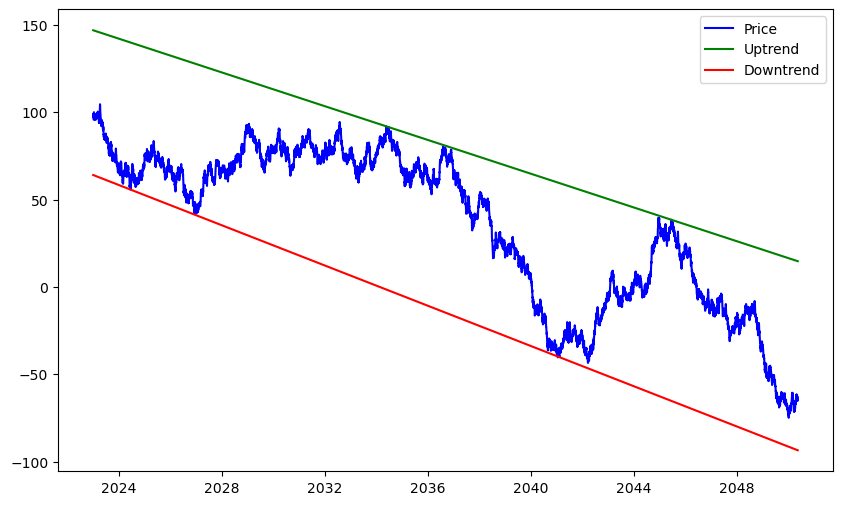

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Sample data (replace with your actual data)
data = pd.DataFrame({
    'Date': pd.date_range('2023-01-01', periods=10000),
    'Price': np.random.randn(10000).cumsum() + 100
})

# Function to identify uptrend and downtrend lines
def find_trendlines(data, window=10):
    highs = data['Price'].rolling(window).max()
    lows = data['Price'].rolling(window).min()

    df = data.copy()
    df['Number'] = np.arange(len(df)) + 1

    # Calculate uptrend line
    df_high = df[['Number', 'Price']].copy()
    while len(df_high) > 2:
        slope_up, intercept_up, _, _, _ = linregress(x=df_high['Number'], y=df_high['Price'])
        df_high = df_high.loc[df_high['Price'] > slope_up * df_high['Number'] + intercept_up]

    # Calculate downtrend line
    df_low = df[['Number', 'Price']].copy()
    while len(df_low) > 2:
        slope_down, intercept_down, _, _, _ = linregress(x=df_low['Number'], y=df_low['Price'])
        df_low = df_low.loc[df_low['Price'] < slope_down * df_low['Number'] + intercept_down]

    # Assign the uptrend and downtrend values
    df['Uptrend'] = slope_up * df['Number'] + intercept_up
    df['Downtrend'] = slope_down * df['Number'] + intercept_down

    return df

# Find trendlines
df = find_trendlines(data)

# Plot the data with trendlines
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Price', color='blue')
plt.plot(df['Date'], df['Uptrend'], label='Uptrend', color='green')
plt.plot(df['Date'], df['Downtrend'], label='Downtrend', color='red')
plt.legend()
plt.show()
